In [74]:
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
drinks_data = pd.read_csv("drinks.csv")
drinks_data.head(500)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [17]:
# tampilkan rata2 per benua tingkat beer servings

avg = drinks_data.groupby('continent')[['beer_servings']].mean()
print(avg)

               beer_servings
continent                   
Africa             61.471698
Asia               37.045455
Europe            193.777778
North America     145.434783
Oceania            89.687500
South America     175.083333


In [20]:
# jumlah negara dari setiap benua

jml = drinks_data.groupby('continent')[['country']].count()
print(jml)

               country
continent             
Africa              53
Asia                44
Europe              45
North America       23
Oceania             16
South America       12


In [64]:
# data negara dan benua yang mempunyai tingkat beer serving dibawah rata2 global 

avg_bs = drinks_data['beer_servings'].mean()
print(avg_bs)
drinks_data[['country', 'continent', 'beer_servings']][drinks_data['beer_servings'] < avg_bs]

106.16062176165804


,country,continent,beer_servings
0,Afghanistan,Asia,0
1,Albania,Europe,89
2,Algeria,Africa,25
5,Antigua & Barbuda,North America,102
7,Armenia,Europe,21
...,...,...,...
186,Uzbekistan,Asia,25
187,Vanuatu,Oceania,21
190,Yemen,Asia,6
191,Zambia,Africa,32


In [68]:
# tampilkan rata2 tingkat beer serving untuk negara di benua europe & afrika 

avg_eu = drinks_data[drinks_data['continent'] == 'Europe']
avg_af = drinks_data[drinks_data['continent'] == 'Africa']

print("rata2 beer serving europe: ", avg_eu['beer_servings'].mean())
print("rata2 beer serving afrika: ", avg_af['beer_servings'].mean())

rata2 beer serving europe:  193.77777777777777
rata2 beer serving afrika:  61.471698113207545


In [80]:
# buktikan negara di europe mempunyai tingkat minum lebih tinggi dari negara asia dan afrika 

avg_as = drinks_data[drinks_data['continent'] == 'Asia']
print("rata2 beer serving asia: ", avg_as['beer_servings'].mean())

asia = avg_as['beer_servings'].mean()
afrika = avg_af['beer_servings'].mean()
eropa = avg_eu['beer_servings'].mean()

rata2 beer serving asia:  37.04545454545455


<BarContainer object of 3 artists>

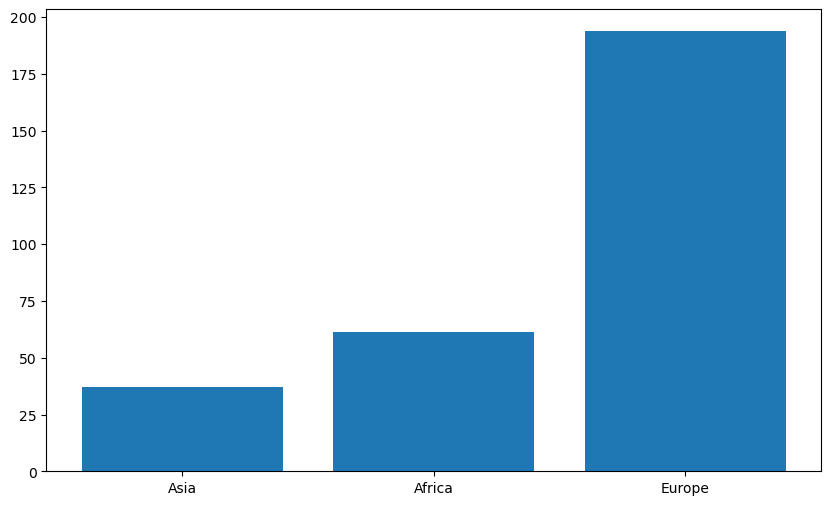

In [108]:
avg = [asia, afrika, eropa]
continents = ['Asia', 'Africa', 'Europe']
plt.figure(figsize=(10,6))
plt.bar(continents, avg)

In [113]:
# tampilkan benua yang memiliki beer serving tertinggi 

highest = drinks_data.groupby('continent')[['beer_servings']].max()
highest.head(1)

,beer_servings
continent,
Africa,376


In [128]:
# tampilkan negara yang mempunyai tingkat minum diatas rata2
#print("rata2 adalah: ", avg_bs)

avg = drinks_data['total_litres_of_pure_alcohol'].mean()
print(avg)

drinks_data[['country', 'total_litres_of_pure_alcohol']][drinks_data['total_litres_of_pure_alcohol'] > avg]

4.717098445595855


,country,total_litres_of_pure_alcohol
1,Albania,4.9
3,Andorra,12.4
4,Angola,5.9
5,Antigua & Barbuda,4.9
6,Argentina,8.3
...,...,...
182,United Kingdom,10.4
183,Tanzania,5.7
184,USA,8.7
185,Uruguay,6.6


In [137]:
# Tampilkan negara yang mempunyai tingkat minum 0
a = drinks_data[drinks_data['total_litres_of_pure_alcohol'] == 0]
print(a)

              country  beer_servings  spirit_servings  wine_servings  \
0         Afghanistan              0                0              0   
13         Bangladesh              0                0              0   
46        North Korea              0                0              0   
79               Iran              0                0              0   
90             Kuwait              0                0              0   
97              Libya              0                0              0   
103          Maldives              0                0              0   
106  Marshall Islands              0                0              0   
107        Mauritania              0                0              0   
111            Monaco              0                0              0   
128          Pakistan              0                0              0   
147        San Marino              0                0              0   
158           Somalia              0                0           

In [187]:
# Tampilkan negara yang mempunyai tingkat minum paling tinggi

# dapetin nilai maksimum
maximum = drinks_data['total_litres_of_pure_alcohol'].max()
print(maximum)

drinks_data[['country']][drinks_data['total_litres_of_pure_alcohol'] == maximum]

14.4


,country
15,Belarus


In [159]:
#[pandas] Tampilkan negara di benua Europe yang mempunyai tingkat minum paling tinggi

eu = drinks_data[drinks_data['continent']=='Europe']
print(eu)

eu[['country','total_litres_of_pure_alcohol']].max()

                country  beer_servings  spirit_servings  wine_servings  \
1               Albania             89              132             54   
3               Andorra            245              138            312   
7               Armenia             21              179             11   
9               Austria            279               75            191   
10           Azerbaijan             21               46              5   
15              Belarus            142              373             42   
16              Belgium            295               84            212   
21   Bosnia-Herzegovina             76              173              8   
25             Bulgaria            231              252             94   
42              Croatia            230               87            254   
44               Cyprus            192              154            113   
45       Czech Republic            361              170            134   
48              Denmark            224

country                         United Kingdom
total_litres_of_pure_alcohol              14.4
dtype: object

In [166]:
#[pandas] Tampilkan daftar benua, jumlah negara yang beer serving nya lebih besar dari 0

cont = drinks_data[['country', 'continent', 'beer_servings']][drinks_data['beer_servings'] > 0]
print(cont)

               country      continent  beer_servings
1              Albania         Europe             89
2              Algeria         Africa             25
3              Andorra         Europe            245
4               Angola         Africa            217
5    Antigua & Barbuda  North America            102
..                 ...            ...            ...
188          Venezuela  South America            333
189            Vietnam           Asia            111
190              Yemen           Asia              6
191             Zambia         Africa             32
192           Zimbabwe         Africa             64

[178 rows x 3 columns]


In [181]:
# [pandas] Tampilkan urutan daftar benua dari tertinggi ke terendah dari jumlah negara yang punya beer serving
lists = drinks_data[['continent', 'country', 'beer_servings']].sort_values('beer_servings', ascending = False)
print(lists)

    continent         country  beer_servings
117    Africa         Namibia            376
45     Europe  Czech Republic            361
62     Africa           Gabon            347
65     Europe         Germany            346
98     Europe       Lithuania            343
..        ...             ...            ...
107    Africa      Mauritania              0
158    Africa         Somalia              0
111    Europe          Monaco              0
128      Asia        Pakistan              0
0        Asia     Afghanistan              0

[193 rows x 3 columns]
